# 911 Calls Capstone Project

The goal of this capstone project is to practice exploratory data analysis using 911 call data pulled from Kaggle.

In [2]:
#manipulation
import numpy as np
import pandas as pd 

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

After importing our libraries, let's get a feel for what's contained within the dataset.

In [3]:
#read in CSV as dataframe calls
calls = pd.read_csv('911.csv')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
calls.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [5]:
calls.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

# Exploratory Data Analysis

The first questions that come to mind are: 

1) Where are the calls coming from?
2) What's the reason for the call?

Question 1 can be answered by using the township or zip code columns, while Question 2 is nested within the title column. We'll address that later.

In [6]:
calls['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
calls['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

There is a discrepancy between most common zip codes and most common townships. Zip 19401 is contained within Norristown, but Norristown has less calls than the zip code does.

This implies that zip codes can exist in multiple townships, and townships can have multiple zip codes. We'll confirm that using a zip code from Norristown.

In [8]:
print('There are {} zip codes in Norristown Township'.format(calls[calls['twp'] == 'NORRISTOWN']['zip'].nunique()))
print('There are {} townships that contain zip code 19401'.format(calls[calls['zip'] == 19401]['twp'].nunique()))

There are 2 zip codes in Norristown Township
There are 9 townships that contain zip code 19401


## Feature Engineering

To address question 2, we will extract some useful variables from the title column to create new features: Reasons and Departments.

In [9]:
#Using lambda function to split title string into separate words
#first index position contains the Department which we save in the new dept col.
calls['Dept.'] = calls['title'].apply(lambda title: title.split(':')[0])

Now that we have access to the Dept. column, let's see how the calls are distributed amongst the departments.

EMS        48877
Traffic    35695
Fire       14920
Name: Dept., dtype: int64


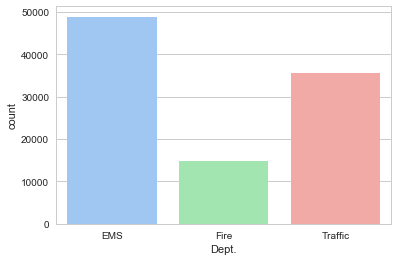

In [10]:
print(calls['Dept.'].value_counts())
sns.countplot(calls['Dept.'], palette='pastel')

In [11]:
print('EMS Calls: Top 3 Townships')
print(calls[calls['Dept.'] == 'EMS']['twp'].value_counts().head(3))
print('\n')
print('Fire Calls: Top 3 Townships')
print(calls[calls['Dept.'] == 'Fire']['twp'].value_counts().head(3))
print('\n')
print('Traffic Calls: Top 3 Townships')
print(calls[calls['Dept.'] == 'Traffic']['twp'].value_counts().head(3))

EMS Calls: Top 3 Townships
NORRISTOWN      3858
LOWER MERION    3171
ABINGTON        3043
Name: twp, dtype: int64


Fire Calls: Top 3 Townships
LOWER MERION    1548
ABINGTON         940
NORRISTOWN       777
Name: twp, dtype: int64


Traffic Calls: Top 3 Townships
LOWER MERION    3724
UPPER MERION    2499
ABINGTON        1994
Name: twp, dtype: int64


Seems like Lower Merion is a rough place to live, the township almost tops all three categories for 911 calls. It has the highest concentration of 911 calls, however, relative to population density it could be safer than other townships.

Next, we'll focus on the timestamps, we can pull a couple useful features from this column. The first that come to mind are hour, day, week, month, and day of the week.

In [12]:
type(calls['timeStamp'].iloc[0]) 

str

In [13]:
#convert string time stamp to datetime
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])

#by converting to datetime, we can now pull specific attributes
calls['Hour'] = calls['timeStamp'].apply(lambda time: time.hour)
calls['Month'] = calls['timeStamp'].apply(lambda time: time.month)
calls['Day of Week'] = calls['timeStamp'].apply(lambda time: time.dayofweek)

calls.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept.,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3


Day of week is returning an integer value between 0-6 which relates to the days of the week (Mon = 0, Tues = 1, and so on...)

Using a dictionary, we will map the actual string names to the day of week integer.

In [14]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

calls['Day of Week'] = calls['Day of Week'].map(dmap)

Using our new features, we'll create a couple graphs to show the distribution of calls based on time.

I'd guess that more calls happen at night and during the holidays when people have more time and freedom.

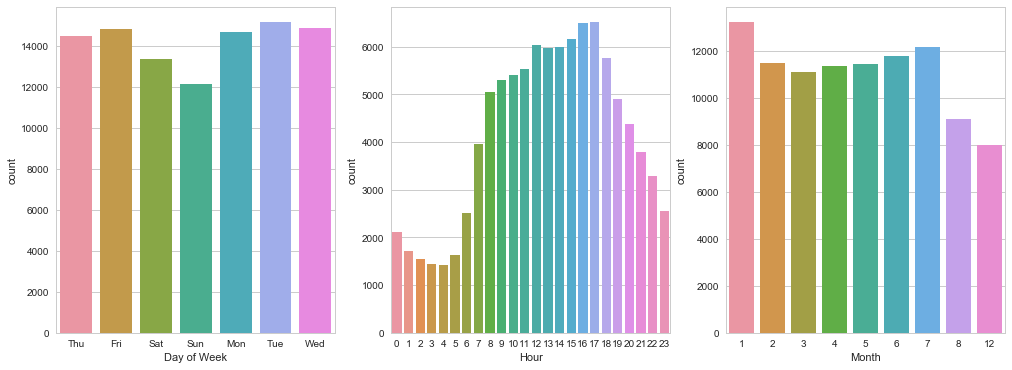

In [15]:
fig = plt.figure(figsize=(17,6))

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.countplot(data=calls, x='Day of Week', ax=ax1)
sns.countplot(data=calls, x='Hour', ax=ax2)
sns.countplot(data=calls, x='Month', ax=ax3)

My conclusion based off of these graphs is: the more reasons people have to stay indoors, the less calls to 911 there will be. Whether it be weather, time of the day, or day of the week.  The hours where most people are asleep or at home, have the lowest call density which makes sense.

Months 9-11 are missing from the data set, let's investigate if we can impute some values using a line plot to get estimates.

In [16]:
byMonth = calls.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept.,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


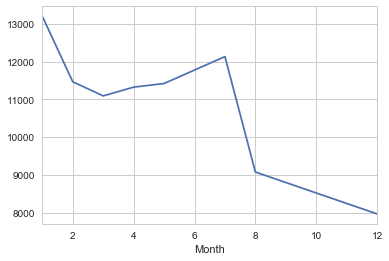

In [17]:
byMonth['twp'].plot()

Using a linear fit on the number of calls per month gives us a rough estimate on how many calls to expect from the missing months.

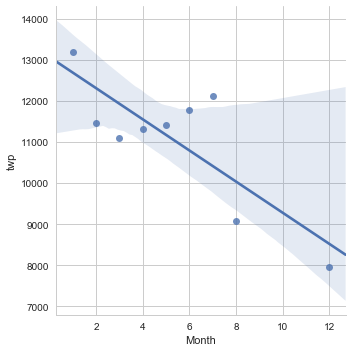

In [18]:
#linear regression plot
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

There are most likely events that cause a spike in calls for a certain time period, for example, a serial arsonist will lead to more calls for the Fire Department. Creating a new feature for the date will help visualizing this.

In [19]:
#convert timestamp into date using lambda function and set it to new Date row
calls['Date']=calls['timeStamp'].apply(lambda t: t.date())

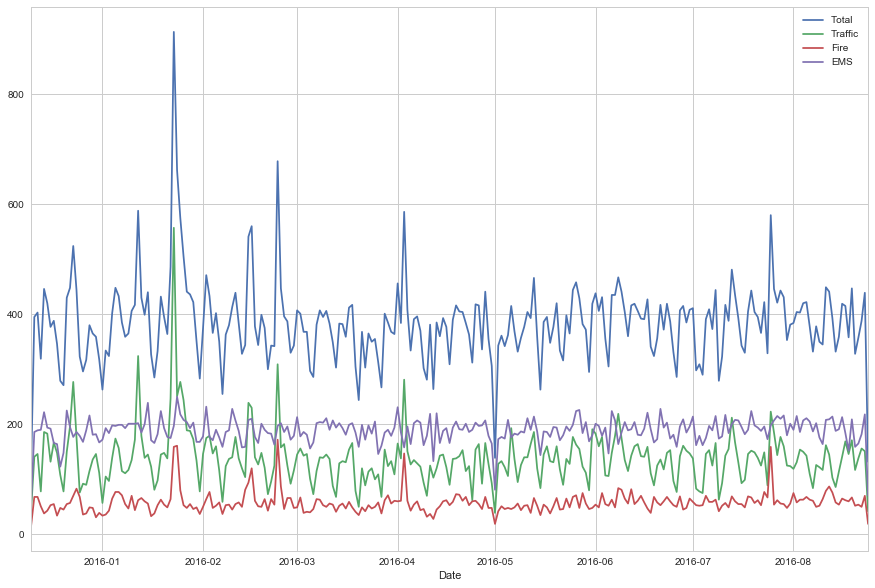

In [24]:
plt.figure(figsize=(15,10))

calls.groupby('Date').count()['twp'].plot(label='Total')
calls[calls['Dept.']=='Traffic'].groupby('Date').count()['twp'].plot(label='Traffic')
calls[calls['Dept.']=='Fire'].groupby('Date').count()['twp'].plot(label='Fire')
calls[calls['Dept.']=='EMS'].groupby('Date').count()['twp'].plot(label='EMS')

plt.legend()

There is a spike in traffic calls towards the end of january 2016. Perhaps that could be attributed to a period of increased snowfall leading to hazardous driving conditions.

Next, we'll take a look at some heatmaps to get a feel for call density.

In [28]:
#Restrucutre dataframe so that day of week is the index and hour 
#is the cols. to pass into heatmap
dayHour = calls.groupby(by=['Day of Week','Hour']).count()['Dept.'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


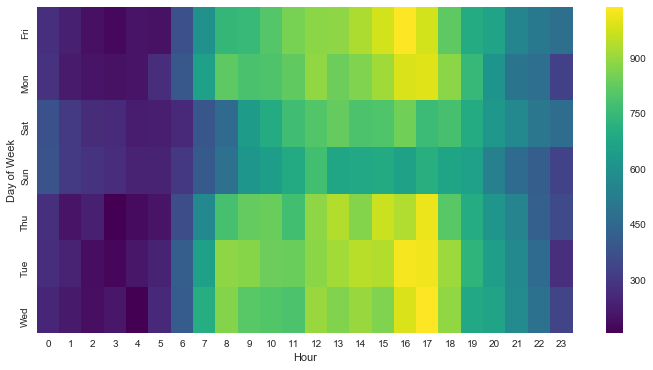

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

C:\Users\mtavarez\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


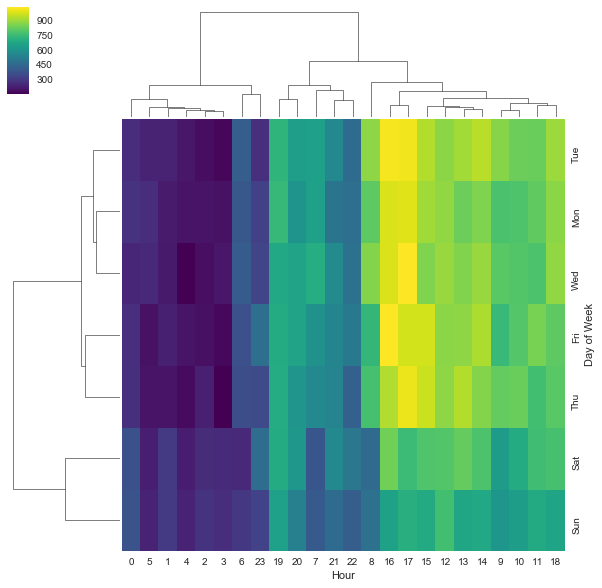

In [30]:
sns.clustermap(dayHour, cmap='viridis')

In [31]:
#Now repeat with day of week and the month
dayMonth = calls.groupby(by=['Day of Week','Month']).count()['Dept.'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


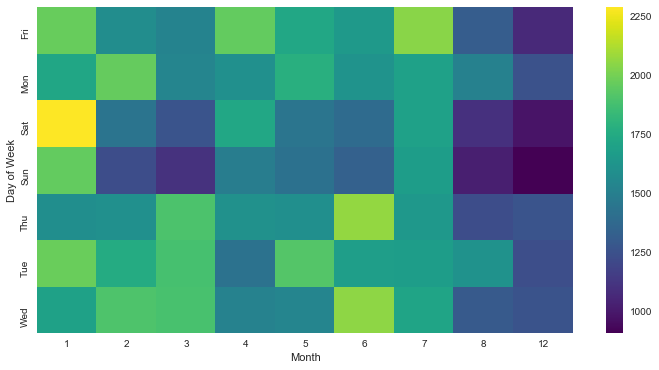

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

C:\Users\mtavarez\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


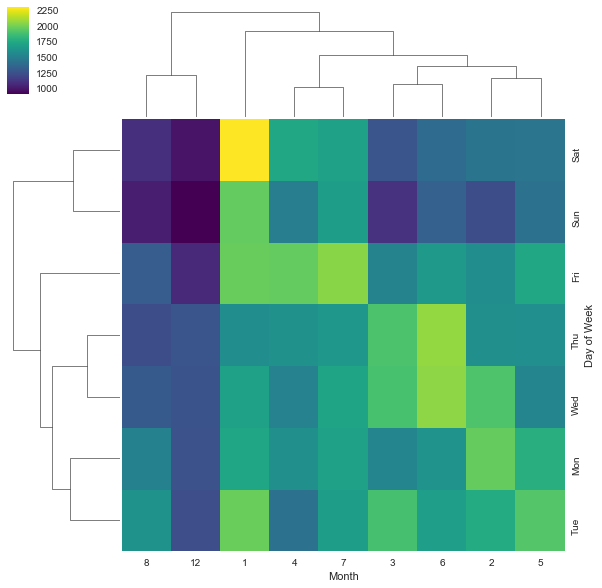

In [35]:
sns.clustermap(dayMonth, cmap='viridis')